# Statistical Modeling with Python

`statsmodels` is better suited for traditional stats

In [33]:
# the statsmodels.api uses numpy array notation
# statsmodels.formula.api use formula notation (similar to R's formula notation)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf

## A minimal OLS example

Four pairs of points

In [34]:
#(1,2),(2,6), (3,4), (4,8)
x = np.array([1,2,3,4,5,6,7,8,9,10])
y = np.array([2,6,4,8,10,12,14,16,18,20])

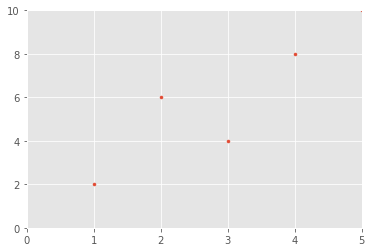

In [35]:
plt.scatter(x,y, marker = '.')
plt.xlim(0,5)
plt.ylim(0,10)
plt.show()

In [36]:
# make a dataframe of our data
d = pd.DataFrame({'x':x, 'y':y})
print(d)

    x   y
0   1   2
1   2   6
2   3   4
3   4   8
4   5  10
5   6  12
6   7  14
7   8  16
8   9  18
9  10  20


Seaborn lmplot

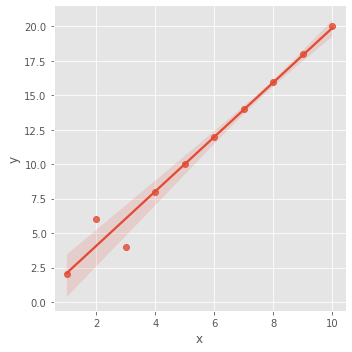

In [37]:
sns.lmplot(x = 'x', y = 'y', data = d)


## Formula notation with statsmodels
use statsmodels.formula.api (often imported as smf)

In [38]:
# data is in a dataframe
model = smf.ols('y ~ x', data = d)


In [39]:
# estimation of coefficients is not done until you call fit() on the model
results = model.fit()



In [40]:

print(results.summary()) 



                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.976
Model:                            OLS   Adj. R-squared:                  0.973
Method:                 Least Squares   F-statistic:                     324.0
Date:                Wed, 16 Nov 2022   Prob (F-statistic):           9.31e-08
Time:                        18:37:25   Log-Likelihood:                -13.043
No. Observations:                  10   AIC:                             30.09
Df Residuals:                       8   BIC:                             30.69
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.1333      0.681      0.196      0.8

/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:1542: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


Using the abline_plot function for plotting the results

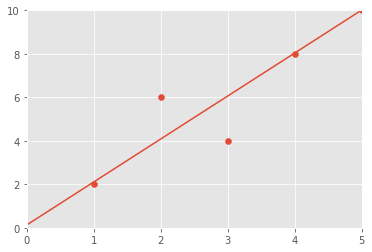

In [41]:
sm.graphics.abline_plot(model_results = results)
plt.scatter(d.x, d.y)

plt.xlim(0,5)
plt.ylim(0,10)

plt.show()

Generating an anova table

In [42]:
print(sm.stats.anova_lm(results))


           df      sum_sq     mean_sq           F        PR(>F)
x         1.0  322.048485  322.048485  324.012195  9.307460e-08
Residual  8.0    7.951515    0.993939         NaN           NaN


Making predictions

In [43]:
results.predict({'x' : 2})

0    4.084848
dtype: float64

## numpy array notation
similar to sklearn's notation

In [44]:
print(x)

[ 1  2  3  4  5  6  7  8  9 10]


In [45]:
X = sm.add_constant(x)  
# need to add a constant for the intercept term.
# because we are using the numpy notation, we use sm rather than smf

In [46]:
print(X)

[[ 1.  1.]
 [ 1.  2.]
 [ 1.  3.]
 [ 1.  4.]
 [ 1.  5.]
 [ 1.  6.]
 [ 1.  7.]
 [ 1.  8.]
 [ 1.  9.]
 [ 1. 10.]]


$$y_i = \beta_0 + \beta_1 x_i + \epsilon_i$$

$$\mathbf{\hat{Y}} = \boldsymbol{\beta} \mathbf{X}$$


In [47]:
# OLS is capitalized in the numpy notation
model2 = sm.OLS(y, X)  


In [48]:
results2 = model2.fit()


In [49]:
print(results2.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.976
Model:                            OLS   Adj. R-squared:                  0.973
Method:                 Least Squares   F-statistic:                     324.0
Date:                Wed, 16 Nov 2022   Prob (F-statistic):           9.31e-08
Time:                        18:37:26   Log-Likelihood:                -13.043
No. Observations:                  10   AIC:                             30.09
Df Residuals:                       8   BIC:                             30.69
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1333      0.681      0.196      0.8

/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:1542: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


## OLS solution

$$(X^TX)^{-1}X^TY$$

In [50]:
X

array([[ 1.,  1.],
       [ 1.,  2.],
       [ 1.,  3.],
       [ 1.,  4.],
       [ 1.,  5.],
       [ 1.,  6.],
       [ 1.,  7.],
       [ 1.,  8.],
       [ 1.,  9.],
       [ 1., 10.]])

In [51]:
np.linalg.inv(X.T @ X) @ (X.T @ y)

array([0.13333333, 1.97575758])

## Plot Interaction of Categorical Factors

https://www.statsmodels.org/dev/examples/notebooks/generated/categorical_interaction_plot.html

In this example, we will visualize the interaction between categorical factors. First, we will create some categorical data. Then, we will plot it using the interaction_plot function, which internally re-codes the x-factor categories to integers.

In [52]:
# https://stackoverflow.com/questions/55663474/interaction-plot-from-statsmodels-formula-api-using-python

import pandas as pd
from statsmodels.formula.api import ols

Consumption = [51, 52, 53, 54, 56, 57, 55, 56, 58, 59, 62, 63]
Gender  = ["Male", "Male", "Male", "Male", "Male", "Male", "Female",
           "Female", "Female", "Female", "Female", "Female"]
Income = [80, 80, 90, 90, 100, 100, 80, 80, 90, 90, 100, 100]

df = pd.DataFrame( {"Consumption": Consumption, "Gender": Gender, "Income": Income})
print(df)

    Consumption  Gender  Income
0            51    Male      80
1            52    Male      80
2            53    Male      90
3            54    Male      90
4            56    Male     100
5            57    Male     100
6            55  Female      80
7            56  Female      80
8            58  Female      90
9            59  Female      90
10           62  Female     100
11           63  Female     100


In [60]:
Reg = ols(formula = "Consumption ~ Gender + Income", data = df)
Fit = Reg.fit()
Fit.summary()

/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:1542: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Consumption   R-squared:                       0.963
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     116.7
Date:                Wed, 16 Nov 2022   Prob (F-statistic):           3.66e-07
Time:                        18:49:15   Log-Likelihood:                -12.525
No. Observations:                  12   AIC:                             31.05
Df Residuals:                       9   BIC:                             32.51
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         31.8333      2.546     12.505      0.000      26.075      37.592
Gender[T.Male]    -5.0000      0.458    -10.914      0.000      -6.036      -3.964
Income             0.3000      0.028     10.694      0.000       0.237       0.363
==============================================================================
Omnibus:                        0.407   Durbin-Watson:                   2.294
Prob(Omnibus):                  0.816   Jarque-Bera (JB):                0.503
Skew:                           0.228   Prob(JB):                        0.778
Kurtosis:                       2.107   Cond. No.                     1.00e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large,  1e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

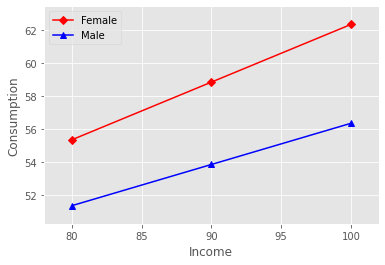

In [54]:
import matplotlib.pyplot as plt
from statsmodels.graphics.factorplots import interaction_plot
plt.style.use('ggplot')

fig = interaction_plot(
   x        = Income,
   trace    = Gender,
   response = Fit.fittedvalues,
   colors   = ['red','blue'],
   markers  = ['D','^'])
plt.xlabel('Income')
plt.ylabel('Consumption')
plt.legend().set_title(None)
plt.show()